<h2>Ananlysis 11. Probabilities of adenine editing depending on the distance to the nearest ES</h2>
We calculate the probabilities of adenine editing for different distances for the real data and for the null model

In [9]:
import numpy as np
from scipy import stats
from editing_adlib import *
import matplotlib.pyplot as plt
import re
import random
%matplotlib inline

In [4]:
def editing_prob(edsites_dict, fastadict):
    double_ed = {}
    single_ed = {}
    for gene_id in edsites_dict.keys():
        seq = fastadict[gene_id]
        es_crds = sorted(list(edsites_dict[gene_id].keys()))
        l = len(es_crds)
        ind = 0
        for i in range(l-1):
            k = es_crds[i+1] - es_crds[i]
            if not double_ed.get(k):
                double_ed[k] = 0
            double_ed[k] += 1
        
        curr_es_ind = 0
        for i in range(len(seq)):
            if seq[i] != 'A':
                continue
                
            l1 = abs(es_crds[curr_es_ind] - i)
            
            if curr_es_ind + 1 == l:
                l2 = l1
            else:
                l2 = abs(es_crds[curr_es_ind + 1] - i)
            
            if l1 > l2:
                curr_es_ind += 1
                l_min = l2
            else:
                l_min = l1
                
            if not single_ed.get(l_min):
                single_ed[l_min] = 0
            single_ed[l_min] += 1
            
    return double_ed, single_ed 

def build_random_s_dist(fastadict, edsite_crd_dict, orf_crd_dict, syn_nsyn = None):
    rand_edsite_crd_dict = dict()
    for seq_id in fastadict.keys():
        if not edsite_crd_dict.get(seq_id):
            continue
        rand_edsite_crd_dict[seq_id] = dict()
        orf = fastadict[seq_id][orf_crd_dict[seq_id][0]:orf_crd_dict[seq_id][1]]
        adenine_pos_arr = [i.start() for i in re.finditer("A", orf)]
        pos_num = len(edsite_crd_dict[seq_id].keys())
        pos_arr = random.sample(adenine_pos_arr, pos_num)
        for i in range(pos_num):
            rand_edsite_crd_dict[seq_id][pos_arr[i]] = True
#    print(rand_edsite_crd_dict)
    return rand_edsite_crd_dict

In [18]:
edsites_oct = read_edsite_crd_file("../data/editing_sites_oct_plus.txt", syn_nsyn = None)
orf_crd_dict_oct = read_orf_crd_file("../data/oct_orf_crds.txt")
fastadict_oct = readfasta("../data/orfs_oct_plus.fa")
rand_s_sites_oct = build_random_s_dist(fastadict_oct, edsites_oct, orf_crd_dict_oct, syn_nsyn = None)

edsites_bim = read_edsite_crd_file("../data/editing_sites_bim_plus.txt", syn_nsyn = None)
orf_crd_dict_bim = read_orf_crd_file("../data/bim_orf_crds.txt")
fastadict_bim = readfasta("../data/orfs_bim_plus.fa")
rand_s_sites_bim = build_random_s_dist(fastadict_bim, edsites_bim, orf_crd_dict_bim, syn_nsyn = None)

edsites_sep = read_edsite_crd_file("../data/editing_sites_sep_plus.txt", syn_nsyn = None)
orf_crd_dict_sep = read_orf_crd_file("../data/sep_orf_crds.txt")
fastadict_sep = readfasta("../data/orfs_sep_plus.fa")
rand_s_sites_sep = build_random_s_dist(fastadict_sep, edsites_sep, orf_crd_dict_sep, syn_nsyn = None)

edsites_squ = read_edsite_crd_file("../data/editing_sites_squ_plus.txt", syn_nsyn = None)
orf_crd_dict_squ = read_orf_crd_file("../data/squ_orf_crds.txt")
fastadict_squ = readfasta("../data/orfs_squ_plus.fa")
rand_s_sites_squ = build_random_s_dist(fastadict_squ, edsites_squ, orf_crd_dict_squ, syn_nsyn = None)

In [16]:
def plot_arr(double_ed_r, 
             single_ed_r, 
             double_ed_0, 
             single_ed_0,
             figname):
    
    real_arr = []
    rand_arr = []
    ratio_arr = []
    unit_arr = []
    stat_sign_arr = []
    sign_thr = 0.0001
    
    for i in sorted(double_ed_r.keys()):
        if double_ed_0.get(i):
            real_arr.append(float(double_ed_r[i])/single_ed_r[i])
            rand_arr.append(float(double_ed_0[i])/single_ed_0[i])
            ratio_arr.append(real_arr[-1]/rand_arr[-1])
            unit_arr.append(1)
            chi2, p, dof, ex = stats.chi2_contingency([[double_ed_r[i],
                                                        single_ed_r[i]],
                                                       [double_ed_0[i],
                                                        single_ed_0[i]]], correction=False)
            if p < sign_thr:
                stat_sign_arr.append(1)
            else:
                stat_sign_arr.append(np.nan)
    
    plt.plot(ratio_arr[:100])
    plt.plot(unit_arr[:100])
    plt.plot(stat_sign_arr[:100])
    plt.savefig(figname)
    plt.show()
    
    print(stat_sign_arr[:100])

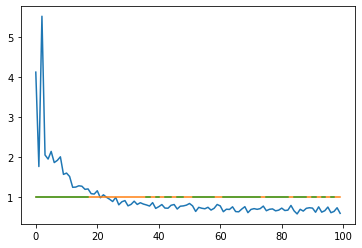

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1, nan, nan, 1, nan, nan, nan, nan, nan, 1, 1, nan, 1, 1, nan, 1, 1, 1, nan, 1, 1, 1, nan, nan, 1, 1, 1, 1, 1, 1, 1, 1, nan, nan, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, nan, 1, 1, 1, 1, 1, 1, 1, 1, nan, 1, 1, 1, 1, 1, nan, 1, 1, nan, 1, 1, nan, 1, 1, nan, 1]


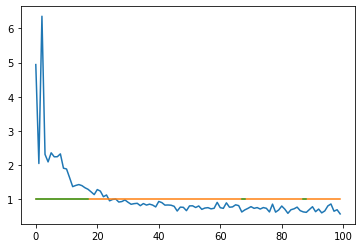

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, nan, nan, 1, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1, nan, nan, 1, nan, nan, nan, nan, 1, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1, 1, nan, nan, nan, nan, nan, nan, nan, 1, nan, 1, nan, nan, nan, 1, nan, nan, nan, nan, 1, 1, nan, nan, 1, nan, 1, nan, nan, nan, 1, nan, 1]


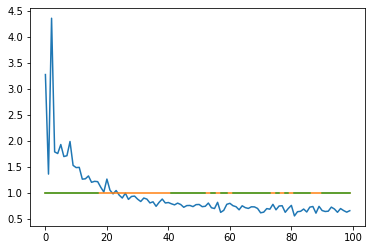

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, nan, nan, 1, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1, nan, 1, nan, nan, 1, nan, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, nan, 1, 1, nan, 1, 1, 1, nan, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, nan, 1, 1, nan, 1, 1, nan, 1, 1, 1, 1, 1, 1, nan, 1, nan, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


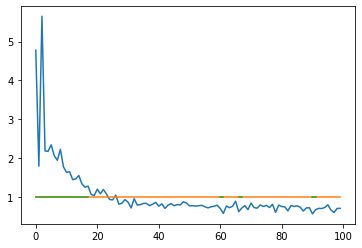

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1, nan, nan, nan, 1, 1, nan, nan, nan, nan, 1, 1, nan, 1, nan, nan, nan, nan, nan, nan, nan, nan, 1, nan, nan, nan, 1, nan, nan, nan, nan, 1, nan, nan, 1, 1, nan, nan, nan, nan, nan, 1, nan, nan]


In [20]:
double_ed_r, single_ed_r = editing_prob(edsites_oct, fastadict_oct)
double_ed_0, single_ed_0 = editing_prob(rand_s_sites_oct, fastadict_oct)
figname = "../article/suppl_figures/An11_distance_prob/oct_vul.pdf"

plot_arr(double_ed_r, 
         single_ed_r, 
         double_ed_0, 
         single_ed_0,
         figname)

double_ed_r, single_ed_r = editing_prob(edsites_bim, fastadict_bim)
double_ed_0, single_ed_0 = editing_prob(rand_s_sites_bim, fastadict_bim)
figname = "../article/suppl_figures/An11_distance_prob/oct_bim.pdf"

plot_arr(double_ed_r, 
         single_ed_r, 
         double_ed_0, 
         single_ed_0,
         figname)

double_ed_r, single_ed_r = editing_prob(edsites_sep, fastadict_sep)
double_ed_0, single_ed_0 = editing_prob(rand_s_sites_sep, fastadict_sep)
figname = "../article/suppl_figures/An11_distance_prob/sep.pdf"

plot_arr(double_ed_r, 
         single_ed_r, 
         double_ed_0, 
         single_ed_0,
         figname)

double_ed_r, single_ed_r = editing_prob(edsites_squ, fastadict_squ)
double_ed_0, single_ed_0 = editing_prob(rand_s_sites_squ, fastadict_squ)
figname = "../article/suppl_figures/An11_distance_prob/squ.pdf"

plot_arr(double_ed_r, 
         single_ed_r, 
         double_ed_0, 
         single_ed_0,
         figname)

In [21]:
len([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

18